In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.style.use('ggplot')
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing

---
#UN Country Dataset Revisited
---

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/TeachingDataScience\
/data-science-course/forstudentviewing/15_kmeans/un.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 0 to 206
Data columns (total 14 columns):
country                   207 non-null object
region                    207 non-null object
tfr                       197 non-null float64
contraception             144 non-null float64
educationMale             76 non-null float64
educationFemale           76 non-null float64
lifeMale                  196 non-null float64
lifeFemale                196 non-null float64
infantMortality           201 non-null float64
GDPperCapita              197 non-null float64
economicActivityMale      165 non-null float64
economicActivityFemale    165 non-null float64
illiteracyMale            160 non-null float64
illiteracyFemale          160 non-null float64
dtypes: float64(12), object(2)
memory usage: 24.3+ KB


In [4]:
#df.info

In [5]:
focus = ['lifeMale', 'lifeFemale','infantMortality','GDPperCapita']
cfocus = ['country', 'lifeMale', 'lifeFemale','infantMortality','GDPperCapita']
df_focus = df[focus]
df_cfocus = df[cfocus]

In [6]:
df_cfocus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 0 to 206
Data columns (total 5 columns):
country            207 non-null object
lifeMale           196 non-null float64
lifeFemale         196 non-null float64
infantMortality    201 non-null float64
GDPperCapita       197 non-null float64
dtypes: float64(4), object(1)
memory usage: 9.7+ KB


In [7]:
df_cfocus_clean = df_cfocus.dropna()

In [8]:
df_cfocus_clean = df_cfocus_clean.reset_index()

In [9]:
df_cfocus_clean = df_cfocus_clean.drop('index', 1)

In [10]:
df_cfocus_clean.head(5)

,country,lifeMale,lifeFemale,infantMortality,GDPperCapita
0,Afghanistan,45.0,46.0,154,2848
1,Albania,68.0,74.0,32,863
2,Algeria,67.5,70.3,44,1531
3,Angola,44.9,48.1,124,355
4,Argentina,69.6,76.8,22,8055


In [11]:
scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True).fit(df_cfocus_clean[focus])
df_fc_scaled = pd.DataFrame(scaler.transform(df_cfocus_clean[focus]), columns=focus)

In [12]:
df_cfc_scaled = df_fc_scaled.copy()
df_cfc_scaled['country'] = df_cfocus_clean.country

In [13]:
df_fc_scaled.head(5)

,lifeMale,lifeFemale,infantMortality,GDPperCapita
0,-1.891557,-2.017900,2.827583,-0.342114
1,0.456800,0.514759,-0.317284,-0.565310
2,0.405749,0.180086,-0.007953,-0.490199
3,-1.901767,-1.827951,2.054255,-0.622430
4,0.620164,0.768025,-0.575060,0.243369


In [14]:
df_cfc_scaled.head(5)

,lifeMale,lifeFemale,infantMortality,GDPperCapita,country
0,-1.891557,-2.017900,2.827583,-0.342114,Afghanistan
1,0.456800,0.514759,-0.317284,-0.565310,Albania
2,0.405749,0.180086,-0.007953,-0.490199,Algeria
3,-1.901767,-1.827951,2.054255,-0.622430,Angola
4,0.620164,0.768025,-0.575060,0.243369,Argentina


In [15]:
X = df_fc_scaled.values
print X.shape

(188, 4)


---
##Is there an knee-of-the-curve value for K?
---

k is 1, inertia is  752.00
k is 2, inertia is  289.78
k is 3, inertia is  140.43
k is 4, inertia is  100.73
k is 5, inertia is  72.73
k is 6, inertia is  57.77
k is 7, inertia is  49.40
k is 8, inertia is  43.64
k is 9, inertia is  38.95
k is 10, inertia is  34.79
k is 11, inertia is  31.64
k is 12, inertia is  29.20
k is 13, inertia is  27.06
k is 14, inertia is  25.61
k is 15, inertia is  23.90
k is 16, inertia is  22.64
k is 17, inertia is  21.38
k is 18, inertia is  20.12
k is 19, inertia is  18.65
k is 20, inertia is  17.96


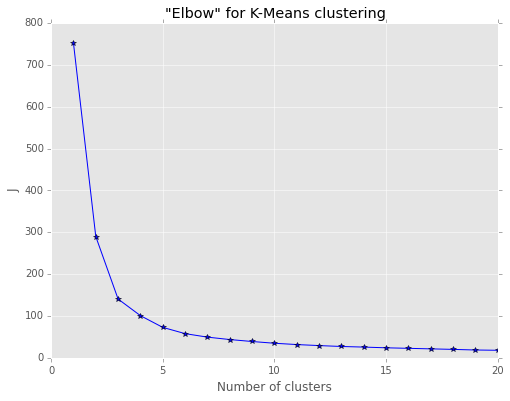

In [16]:
inertia_list = []
k_list = []

for k in xrange(1, 21):
    
    # create a new KMeans object for each value of k
    kmeans = KMeans(n_clusters = k, max_iter = 1000, n_init = 100, tol = 1e-6, n_jobs = -1, \
                 random_state=8, verbose=False)
    kmeans.fit(X)
    
    print "k is {:d}, inertia is  {:5.2f}".format(k, kmeans.inertia_)
    
    # inertia: Sum of distances of samples to their closest cluster center
    inertia_list.append(kmeans.inertia_) 
    k_list.append(k)
    
# plot elbow curve
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(k_list, inertia_list, 'b*-')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('J')
ax.set_title('"Elbow" for K-Means clustering')  

---
##Fit the number of clusters you think is ideal - for convenience keep it to 6 or less!
---

In [17]:
k=6
km = KMeans(n_clusters = k, max_iter = 1000, n_init = 100, tol = 1e-6, n_jobs = -1, \
                 random_state=8, verbose=False)
km.fit(X)
c = km.predict(X)
myPCA = PCA(n_components = 2).fit(X)
X_2d = myPCA.transform(X)

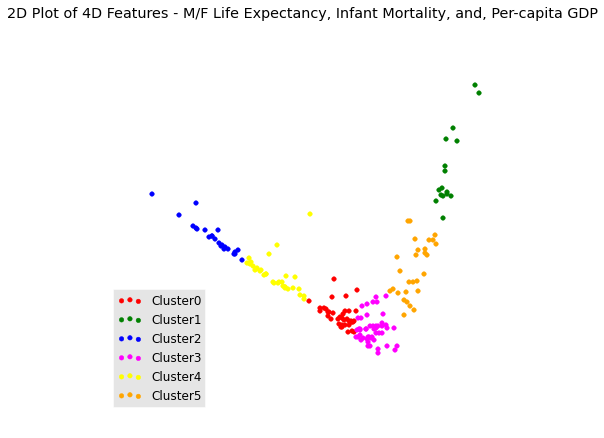

In [18]:
color_list = ['red', 'green', 'blue', 'magenta', 'yellow', 'orange']
fig = plt.figure(figsize = (7,7))
ax = plt.subplot(111)
for cc in xrange(k):
    label_str = 'Cluster' + str(cc)
    ax.scatter(X_2d[c==cc,0], X_2d[c==cc,1], color=color_list[cc%len(color_list)], label=label_str)

ax.set_axis_off()
ax.set_title('2D Plot of 4D Features - M/F Life Expectancy, Infant Mortality, and, Per-capita GDP')
ax.legend(loc='lower left')

---
##Let's see if we can determine what the clusters mean
---

In [19]:
cdict = {}
for cc in xrange(k):
    cdict[cc] = []
a1 = []
a2 = []
a3 = []
Xc = df_cfc_scaled[focus].values
yc = km.predict(Xc)

for i in xrange(len(yc)):
    for cc in xrange(k):
        if yc[i] == cc:
            cdict[cc].append(df_cfc_scaled.loc[i].country)
        else: 
            cdict[cc].append('Zkm')

for cc in xrange(k):
    cdict[cc] = sorted(cdict[cc])

---
##Let's look at how the countries were clustered
---

In [20]:
for cc in xrange(k):
    label_str = 'Cluster {:d}'.format(cc)
    print "{:18s}".format(label_str),
print "\n"
for i in xrange(len(cdict[0])):
    do_print = False
    for j in xrange(k):
        if cdict[j][i] != 'Zkm':
            do_print = True
    if do_print:
        for j in xrange(k):
            if cdict[j][i] != 'Zkm':
                print "{:18s}".format(cdict[j][i][0:15]),
            else:
                print "{:18s}".format(' '),
        print "\n"

Cluster 0          Cluster 1          Cluster 2          Cluster 3          Cluster 4          Cluster 5          

Algeria            Austria            Afghanistan        Albania            Bangladesh         Australia          

Brazil             Belgium            Angola             Argentina          Benin              Bahamas            

Cape.Verde         Denmark            Burkina.Faso       Armenia            Bhutan             Bahrain            

China              Finland            Burundi            Azerbaijan         Bolivia            Barbados           

Ecuador            France             Central.African    Belarus            Botswana           Brunei             

Egypt              Germany            Chad               Belize             Cambodia           Canada             

El.Salvador        Hong.Kong          Djibouti           Bosnia             Cameroon           Cyprus             

Guatemala          Iceland            Equatorial.Guin    Bulgaria       

---
##Not sure about doing this, however
---

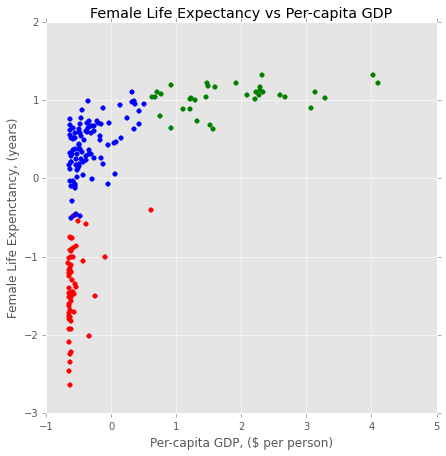

In [21]:
k=3
km = KMeans(n_clusters = k, max_iter = 1000, n_init = 100, tol = 1e-6, n_jobs = -1, \
                 random_state=8, verbose=False)
km.fit(X)
c = km.predict(X)

fig = plt.figure(figsize = (7,7))
ax = plt.subplot(111)
ax.scatter(df_cfc_scaled['GDPperCapita'][c==0], df_cfc_scaled['lifeFemale'][c==0], color = 'red')
ax.scatter(df_cfc_scaled['GDPperCapita'][c==1], df_cfc_scaled['lifeFemale'][c==1], color = 'green')
ax.scatter(df_cfc_scaled['GDPperCapita'][c==2], df_cfc_scaled['lifeFemale'][c==2], color = 'blue')

ax.set_title('Female Life Expectancy vs Per-capita GDP')
ax.set_xlabel('Per-capita GDP, ($ per person)')
ax.set_ylabel('Female Life Expenctancy, (years)')

---
##Who does the outlier belong too?
##Has a good-ish GDP but very low female life expectancy
---

In [22]:
dfwho = df_cfc_scaled[(df_cfc_scaled['GDPperCapita']> 0.2) & (df_cfc_scaled['GDPperCapita']< 0.8)]
dfwho[(dfwho['lifeFemale']>-1) & (dfwho['lifeFemale']<0)]

,lifeMale,lifeFemale,infantMortality,GDPperCapita,country
77,-0.268128,-0.398807,1.306705,0.60914,Iraq


---
##So is that Iraq on the original 2D diagram?
---

In [23]:
Xiraq = df_cfc_scaled[df_cfc_scaled.country=='Iraq']
Xiraq = Xiraq[focus]
X_iraq_2d = myPCA.transform(Xiraq)

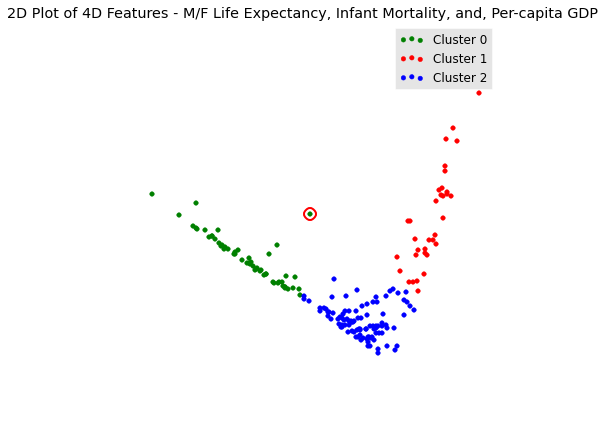

In [24]:
fig = plt.figure(figsize = (7,7))
ax = plt.subplot(111)
ax.scatter(X_2d[c==0,0], X_2d[c==0,1], color = 'green', label='Cluster 0')
ax.scatter(X_2d[c==1,0], X_2d[c==1,1], color = 'red', label='Cluster 1')
ax.scatter(X_2d[c==2,0], X_2d[c==2,1], color = 'blue', label='Cluster 2')
ax.set_axis_off()
ax.set_title('2D Plot of 4D Features - M/F Life Expectancy, Infant Mortality, and, Per-capita GDP')
ax.legend(loc='upper right')
ax.plot(X_iraq_2d[0][0], X_iraq_2d[0][1], marker='o', markersize=12, 
      markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')